<a href="https://colab.research.google.com/github/canunz/LIBRARY-django/blob/main/Evaluacion_2_Jossue_Padron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎮 Análisis de ventas y comportamiento del mercado de videojuegos (1995–2024)

Fuente: VGChartz 2024 (https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024)

# 🧾 Abstract

Este trabajo tiene como objetivo analizar los factores determinantes del éxito comercial de los videojuegos en el periodo 1995–2024, utilizando técnicas de aprendizaje automático supervisado y no supervisado.

A partir de un dataset proveniente de VGChartz, se integraron variables clave como año de lanzamiento, puntuación crítica, género y consola.
Se aplicaron tres enfoques complementarios:

(1) Regresión para estimar las ventas totales en función de la valoración crítica y el año de lanzamiento.

(2) Clasificación para predecir si un título alcanzará ventas altas o bajas, según su desempeño crítico.

(3) Clustering (K-Means) para segmentar el mercado y descubrir grupos naturales de videojuegos con características similares.
Los resultados muestran que la valoración crítica es un factor clave del éxito comercial, aunque otros elementos como el año o la consola también influyen. El modelo de clasificación alcanzó un F1-score de 0.65, mientras que el análisis de clusters identificó tres segmentos principales según época y recepción crítica.

En conjunto, los hallazgos ofrecen insumos valiosos para la toma de decisiones estratégicas en Business Intelligence, orientadas a la planeación de lanzamientos, posicionamiento de productos y gestión de franquicias dentro de la industria de videojuegos

# 🎯 Objetivos
**Objetivo general**

Analizar los patrones de ventas y desempeño de los videojuegos mediante técnicas de regresión, clasificación y agrupamiento, para identificar factores críticos de éxito comercial y segmentos estratégicos en la industria del entretenimiento digital.

**Objetivos específicos**

Aplicar un modelo de regresión que permita estimar las ventas totales a partir de variables cuantitativas como la puntuación crítica y el año de lanzamiento.

Desarrollar un modelo de clasificación que prediga si un videojuego tendrá ventas altas o bajas, en función de su desempeño y características técnicas.

Implementar un modelo de clustering (K-Means) para descubrir grupos de videojuegos con patrones de valoración y época similares, facilitando la segmentación del mercado

# 🧩 Hipótesis
Hipótesis general

Existe una relación positiva significativa entre la puntuación crítica y las ventas totales de los videojuegos, modulada por el año de lanzamiento y la consola asociada

# Hipótesis específicas

# Regresion

**Hipotesis especifica:**
Un mayor Critic_score, mayores ventas totales

**Evidencia esperada:**
Coeficiente positivo y significativo en el modelo de regresion


# Clasificacion

**Hipotesis especifica:**
Los videojuegos con critic_score alto tienen mayor probabilidad de pertenecer a la clase “ventas altas”

**Evidencia esperada:**
Alta precisión y recall en la clase “Altas ventas”

# Clustering

**Hipotesis especifica:**
Existen grupos naturales de videojuegos que se diferencian principalmente por critic_score y año, representando distintas etapas del mercado

**Evidencia esperada:**
Silhouette positivo (>0.35) con clusters interpretables

# Configuracion inicial del Entorno
El objetivo de esta seccion es importar todas las librerias necesarias y establecer una configuracion para el entorno de trabajo

Nota importante:
>
> El dataset utilizado registra únicamente **ventas físicas** de videojuegos (formato retail), sin considerar descargas digitales ni microtransacciones.
>
> Esto implica que las caídas observadas en los últimos años no reflejan una contracción real del mercado, sino una **transición hacia el formato digital y nuevas modalidades de consumo** **texto en negrita**

In [ ]:
import numpy as np
import pandas as pd
import random, os

# Reproducibilidad
np.random.seed(42)
random.seed(42)
os.environ["PYTHONHASHSEED"] = "42"

# Librerías principales
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, silhouette_score
)

print("Librerías cargadas correctamente ✅")

Librerías cargadas correctamente ✅


# Carga y exploracion del dataset
Aqui importaremos el dataset que vamos a estar utilizando (VGCHARTZ-2024) y haremos una revision inicial de la estructura, los tipos de datos y la presencia de valores nulos

In [ ]:

from google.colab import files

# Sube el archivo vgchartz-2024.csv desde tu PC
uploaded = files.upload()

# Cargar dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['vgchartz-2024.csv']))

# Vista general
print("Dimensiones del dataset:", df.shape)
df.head()

Saving vgchartz-2024.csv to vgchartz-2024.csv
Dimensiones del dataset: (64016, 14)


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [ ]:
# Revisión general de valores nulos y tipos
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


,0
critic_score,57338
jp_sales,57290
na_sales,51379
pal_sales,51192
other_sales,48888
last_update,46137
total_sales,45094
release_date,7051
developer,17
publisher,0


# Distribucion inicial de ventas totales y control de outliers
Visualizamos la variable principal que es Total_sales y revisamos si hay valores extremos o un sesgo, aplicaremos una winsorizacion que es es la transformación de las estadísticas mediante la limitación de los valores extremos en los datos estadísticos para reducir el efecto de posibles valores atípicos.

Todo esto para obtener una variable de ventas mas equilibrada

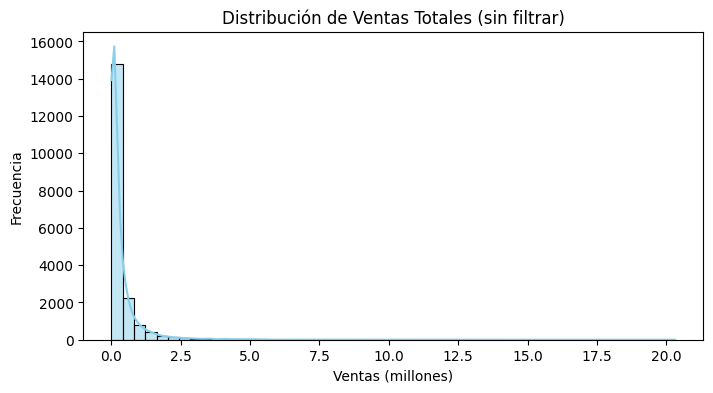

,total_sales
count,18922.000000
mean,0.349113
std,0.807462
min,0.000000
25%,0.030000
50%,0.120000
75%,0.340000
max,20.320000


In [ ]:
# Distribución básica de ventas totales
plt.figure(figsize=(8,4))
sns.histplot(df['total_sales'], bins=50, kde=True, color='skyblue')
plt.title("Distribución de Ventas Totales (sin filtrar)")
plt.xlabel("Ventas (millones)")
plt.ylabel("Frecuencia")
plt.show()

# Estadísticas básicas
df['total_sales'].describe()

In [ ]:
q99 = df['total_sales'].quantile(0.99)
print("Punto de corte (percentil 99%):", round(q99,2))

# Clipping (winsorización)
df['total_sales_cap'] = df['total_sales'].clip(upper=q99)

# Transformación logarítmica para análisis más equilibrado
df['log_total_sales'] = np.log1p(df['total_sales_cap'])

Punto de corte (percentil 99%): 3.54


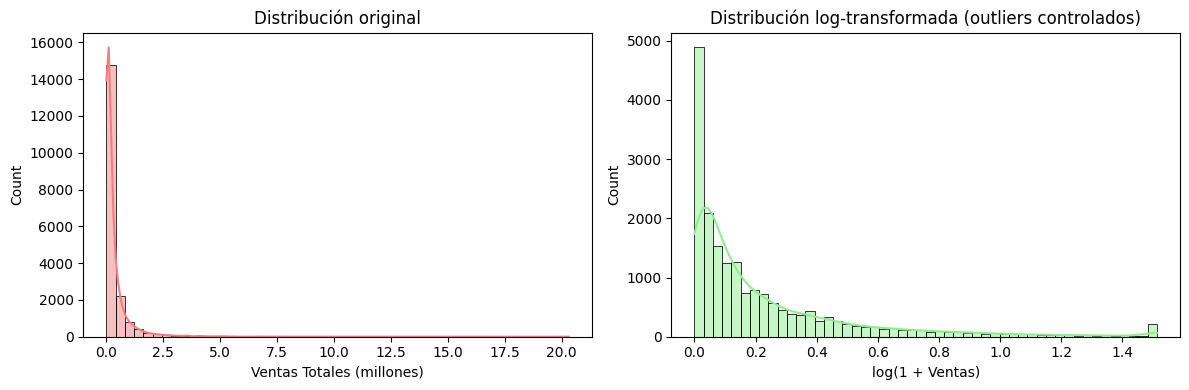

In [ ]:
# Histograma comparativo
fig, axes = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df['total_sales'], bins=50, kde=True, ax=axes[0], color='lightcoral')
axes[0].set_title('Distribución original')
axes[0].set_xlabel('Ventas Totales (millones)')

sns.histplot(df['log_total_sales'], bins=50, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Distribución log-transformada (outliers controlados)')
axes[1].set_xlabel('log(1 + Ventas)')

plt.tight_layout()
plt.show()

La distribución original de ventas mostraba una fuerte asimetría debido a un pequeño grupo de títulos superventas.
Para reducir la influencia de estos outliers, se aplicó una winsorización al percentil 99 y una transformación logarítmica.
Esto permitió obtener una distribución más equilibrada y adecuada para los modelos predictivos

# Analisis Exploratorio de Datos (EDA)

Exploraremos las principales relaciones y tendencias del dataset identificando patrones de venta a lo largo del tiempo y diferencias entre generos de videojuegos

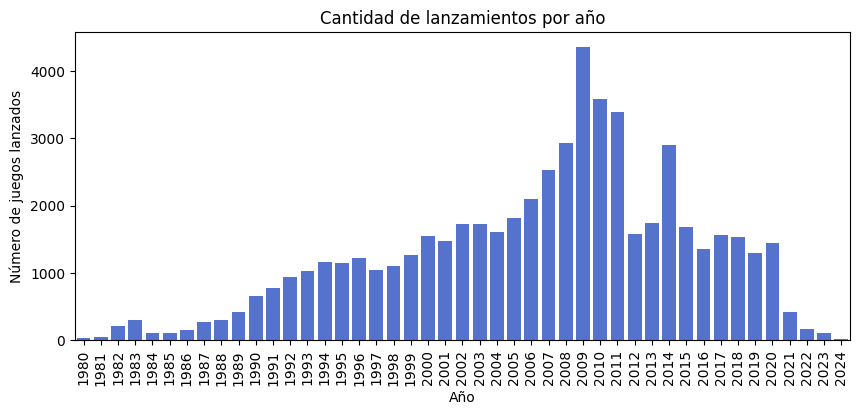

In [ ]:
# Convertir fechas a año
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['Year'] = df['release_date'].dt.year

# Eliminar valores nulos de año
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# Filtramos años razonables (1980–2024)
df = df[(df['Year'] >= 1980) & (df['Year'] <= 2024)]

# Conteo de lanzamientos por año
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Year', color='royalblue')
plt.title("Cantidad de lanzamientos por año")
plt.xticks(rotation=90)
plt.ylabel("Número de juegos lanzados")
plt.xlabel("Año")
plt.show()

El grafico muestra una clara tendencia creciente en el numero de lanzamientos desde los 80 hasta finales de la decada de 2000, alcanzando un pico en 2010 con mas de 4000 titulos publicados.
Despues de este punto podemos ver una disminucion progresiva en los años siguientes que podria explicarse por los siguientes factores:




*   Consolidacion de grandes franquicias y menor numero de titulos medianos
*   La transicion hacia las plataformas digitales que han cambiado la forma de distribuir juegos
*   Todos los efectos del Covid-19 a partir del 2021 y los cambios a modelos de negocio como servicios de suscripcion o mayor tiempo entre lanzamientos






/tmp/ipython-input-1853091705.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg_sales.values, y=genre_avg_sales.index, palette='crest')


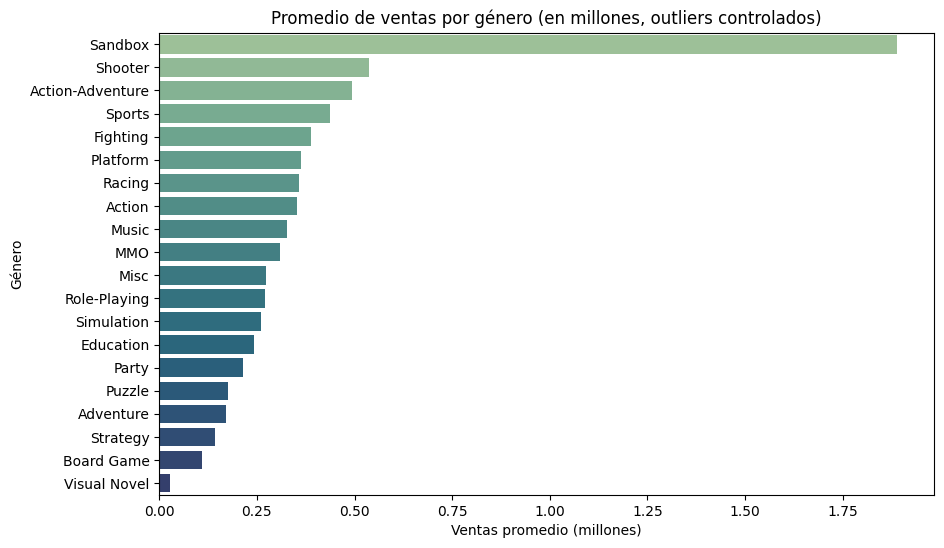

,total_sales_cap
genre,
Sandbox,1.89
Shooter,0.54
Action-Adventure,0.49
Sports,0.44
Fighting,0.39
Platform,0.36
Racing,0.36
Action,0.35
Music,0.33


In [ ]:
genre_avg_sales = df.groupby('genre')['total_sales_cap'].mean().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10,6))
sns.barplot(x=genre_avg_sales.values, y=genre_avg_sales.index, palette='crest')
plt.title("Promedio de ventas por género (en millones, outliers controlados)")
plt.xlabel("Ventas promedio (millones)")
plt.ylabel("Género")
plt.show()

# Mostrar tabla resumen
genre_avg_sales.round(2)

El grafico muestra que el genero Sandbox encabeza con diferencia el promedio de ventas por titulo, seguido por Shooter, Action-Adventure y sports.

Tiene sentido ya que los juegos como Sandbox (minecraft, gtaV o the sims) suele tener pocas entregas pero altisimas ventas por titulo elevando el promedio general del genero

En cambio shooter y Action-Adventure tienen mas titulos lanzados lo que equilibra su promedio, aunque sigan siendo muy domintantes en el mercado

Los generos mas casuales o de nicho como las novelas visuales, juegos de mesa o estrategia muestran ventas promedio mucho menores

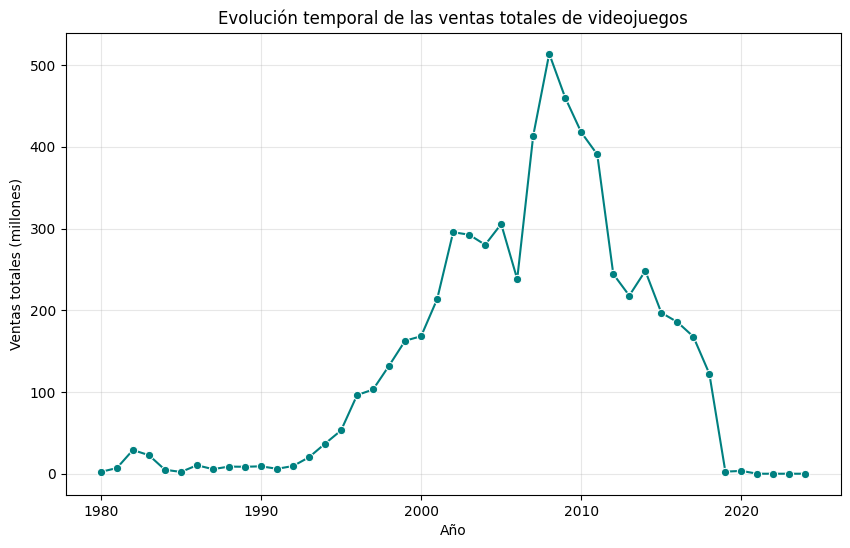

In [ ]:
sales_by_year = df.groupby('Year')['total_sales_cap'].sum().reset_index()

# Visualización
plt.figure(figsize=(10,6))
sns.lineplot(data=sales_by_year, x='Year', y='total_sales_cap', marker='o', color='teal')
plt.title("Evolución temporal de las ventas totales de videojuegos")
plt.xlabel("Año")
plt.ylabel("Ventas totales (millones)")
plt.grid(True, alpha=0.3)
plt.show()

En el gráfico se observa un crecimiento sostenido en las ventas de videojuegos desde la década de 1990, alcanzando su punto máximo entre los años 2008 y 2011  
Este período coincide con la expansión del mercado de consolas domésticas (PlayStation 3, Xbox 360, Nintendo Wii), que impulsaron las ventas a niveles históricos

Tras ese pico, se evidencia una tendencia decreciente, asociada principalmente a:
- El cambio del formato físico al digital, lo que reduce las cifras registradas en este tipo de dataset.  
- Una mayor fragmentación del mercado, con más títulos distribuidos pero menores ventas promedio por juego.  
- La adopción de nuevos modelos de negocio como free-to-play y microtransacciones, que desplazan la métrica tradicional de ventas.


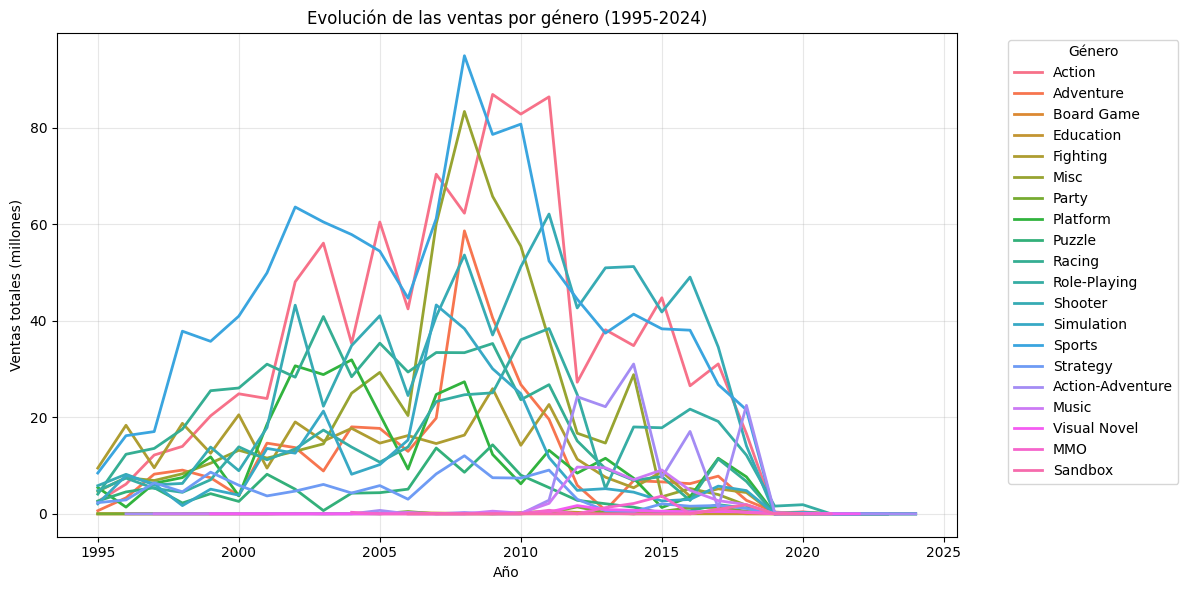

In [ ]:
sales_genre_year = df.groupby(['Year', 'genre'])['total_sales_cap'].sum().reset_index()

# Filtrar solo años con suficiente información (por ejemplo, después del 1995)
sales_genre_year = sales_genre_year[sales_genre_year['Year'] >= 1995]

# Visualización
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_genre_year, x='Year', y='total_sales_cap', hue='genre', lw=2)
plt.title("Evolución de las ventas por género (1995-2024)")
plt.xlabel("Año")
plt.ylabel("Ventas totales (millones)")
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Tendencias generales**

Se observa un crecimiento fuerte desde finales de los 90 hasta alrededor del 2010, donde se alcanzan los valores más altos en casi todos los géneros.

Después de 2012, la mayoría de los géneros muestran una caída progresiva en ventas.
Esto refleja el declive del formato físico y el cambio hacia modelos digitales no reflejados en este tipo de dataset.

**Géneros destacados**

Shooter, Action y Sports dominan las ventas totales en la mayoría de los años, confirmando que los títulos de acción, disparos y deportes concentran el mercado principal.

Sandbox y MMO aparecen con un crecimiento más reciente, lo que refleja la expansión de juegos con mundo abierto y componentes online (Minecraft, Fortnite, GTA Online).

Géneros como Puzzle, Music, y Board Game muestran ventas menores o ciclos más cortos de popularidad.

**Cambios de era**

Entre 1995 y 2005, el auge viene impulsado por el crecimiento de las consolas domésticas y los grandes lanzamientos AAA.

De 2008 a 2011, se alcanza el punto máximo de la industria.

A partir de 2015, la diversificación de plataformas (móviles, PC, digital) fragmenta las ventas, haciendo que la distribución por género se vea más pareja

# Particion de datos y preparacion para los modelos

Aqui comenzamos con la fase predictiva del analisis, donde vamos a aplicar las tres tecnicas que se estan solicitando
Regresion
Clasificacion
Clustering

*   Regresion
*   Clasificacion
*   Clustering

Pero antes vamos a preparar los datos




### Partición de datos y preparación para los modelos

Para aplicar las técnicas de regresión, clasificación y agrupamiento, se realizó una limpieza adicional de los datos, eliminando valores nulos e inconsistencias.

Se crearon variables numéricas normalizadas y una variable categórica llamada **sales_level**, que clasifica los videojuegos según su nivel de ventas (bajo, medio o alto) usando percentiles.

Posteriormente, los datos se dividieron en conjuntos de entrenamiento (70%) y prueba (30%), asegurando la reproducibilidad mediante una semilla fija (`random_state=42`).


# Regresion - Gradient Boosting (con log)

In [ ]:
df_reg = df.copy()

# Estandarizamos columnas
df_reg.columns = df_reg.columns.str.strip().str.lower()

# Convertimos fechas a año (si aplica)
if 'release_date' in df_reg.columns:
    df_reg['release_date'] = pd.to_datetime(df_reg['release_date'], errors='coerce')
    df_reg['year'] = df_reg['release_date'].dt.year

# Eliminamos columnas irrelevantes o derivadas
cols_to_drop = ['img', 'title', 'publisher', 'developer', 'last_update',
                'total_sales', 'na_sales', 'pal_sales', 'jp_sales', 'other_sales', 'log_total_sales']
df_reg = df_reg.drop(columns=cols_to_drop, errors='ignore')

# Eliminamos nulos en critic_score o year
df_reg = df_reg.dropna(subset=['total_sales_cap', 'critic_score', 'year', 'genre', 'console'])

# Codificamos categóricas
df_reg = pd.get_dummies(df_reg, columns=['genre', 'console'], drop_first=True)

df_reg_filtered = df_reg[df_reg['total_sales_cap'] < df_reg['total_sales_cap'].quantile(0.97)]

# Redefinimos X e y usando el dataset filtrado
X_filtered = df_reg_filtered.drop(columns=['total_sales_cap'])
y_filtered = df_reg_filtered['total_sales_cap']

# Nueva división entrenamiento / prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)

print(f"✅ Dataset filtrado: {df_reg_filtered.shape[0]} filas (sin superventas)")

X = df_reg.drop(columns=['total_sales_cap'])
y = df_reg['total_sales_cap']

# Si aún hay columnas datetime, las convertimos a año numérico
for col in X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns:
    X[col] = X[col].dt.year

# También verificamos si queda alguna columna no numérica
non_numeric = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric) > 0:
    print("⚠️ Eliminando columnas no numéricas:", list(non_numeric))
    X = X.drop(columns=non_numeric)

# --- 3. División de datos ---
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)




✅ Dataset filtrado: 3966 filas (sin superventas)
⚠️ Eliminando columnas no numéricas: ['genre_Action-Adventure', 'genre_Adventure', 'genre_Board Game', 'genre_Education', 'genre_Fighting', 'genre_MMO', 'genre_Misc', 'genre_Music', 'genre_Party', 'genre_Platform', 'genre_Puzzle', 'genre_Racing', 'genre_Role-Playing', 'genre_Sandbox', 'genre_Shooter', 'genre_Simulation', 'genre_Sports', 'genre_Strategy', 'genre_Visual Novel', 'console_DC', 'console_DS', 'console_GB', 'console_GBA', 'console_GBC', 'console_GC', 'console_GEN', 'console_N64', 'console_NES', 'console_NS', 'console_PC', 'console_PS', 'console_PS2', 'console_PS3', 'console_PS4', 'console_PSN', 'console_PSP', 'console_PSV', 'console_SAT', 'console_SNES', 'console_VC', 'console_Wii', 'console_WiiU', 'console_X360', 'console_XB', 'console_XBL', 'console_XOne']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Partimos desde df_reg (ya limpio y con dummies) ---
# (si ya filtraste outliers por cuantil o por 3*std, usa ese df_reg filtrado)
df_model = df_reg.copy()

# (Opcional) Filtrado anti-outliers por 3 desviaciones estándar
mu = df_model['total_sales_cap'].mean()
sd = df_model['total_sales_cap'].std()
df_model = df_model[df_model['total_sales_cap'] < mu + 3*sd]

# X / y base
X = df_model.drop(columns=['total_sales_cap'])
y = df_model['total_sales_cap']

# --- 1) CONVERSIÓN DE DATETIME A AÑO (si quedara algo) ---
for col in X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns:
    X[col] = X[col].dt.year

# --- 2) ELIMINA CUALQUIER RESTO NO NUMÉRICO ---
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print("⚠️ Se eliminarán columnas no numéricas:", list(non_numeric_cols))
    X = X.drop(columns=non_numeric_cols)

print("✅ Tipos en X tras sanitizar:", X.dtypes.unique())

# --- 3) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, shuffle=True
)

# --- 4) Target en log para estabilizar varianza
y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

# --- 5) Modelo: Gradient Boosting Regressor (robusto)
gbr = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    random_state=42
)

# Entrena en espacio log
gbr.fit(X_train, y_train_log)

# Predice (log) y vuelve a escala original
y_pred_log = gbr.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_orig = np.expm1(y_test_log)

# --- 6) Métricas en escala original
mae = mean_absolute_error(y_test_orig, y_pred)
mse = mean_squared_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred)

print("\n📊 Métricas (escala original):")
print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")

# --- 7) Cross-val en log (más estable)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2_log = cross_val_score(gbr, X, np.log1p(y), cv=kf, scoring='r2')
print("\n🔁 Cross-val en log(ventas) — R² por fold:")
print(cv_r2_log)
print(f"Promedio R² (log): {cv_r2_log.mean():.4f} | Std: {cv_r2_log.std():.4f}")

⚠️ Se eliminarán columnas no numéricas: ['genre_Action-Adventure', 'genre_Adventure', 'genre_Board Game', 'genre_Education', 'genre_Fighting', 'genre_MMO', 'genre_Misc', 'genre_Music', 'genre_Party', 'genre_Platform', 'genre_Puzzle', 'genre_Racing', 'genre_Role-Playing', 'genre_Sandbox', 'genre_Shooter', 'genre_Simulation', 'genre_Sports', 'genre_Strategy', 'genre_Visual Novel', 'console_DC', 'console_DS', 'console_GB', 'console_GBA', 'console_GBC', 'console_GC', 'console_GEN', 'console_N64', 'console_NES', 'console_NS', 'console_PC', 'console_PS', 'console_PS2', 'console_PS3', 'console_PS4', 'console_PSN', 'console_PSP', 'console_PSV', 'console_SAT', 'console_SNES', 'console_VC', 'console_Wii', 'console_WiiU', 'console_X360', 'console_XB', 'console_XBL', 'console_XOne']
✅ Tipos en X tras sanitizar: [dtype('float64') dtype('int32')]

📊 Métricas (escala original):
MAE:  0.3849
MSE:  0.3563
RMSE: 0.5969
R²:   0.0877

🔁 Cross-val en log(ventas) — R² por fold:
[0.12507672 0.17648221 0.0983

# Importancia de variables

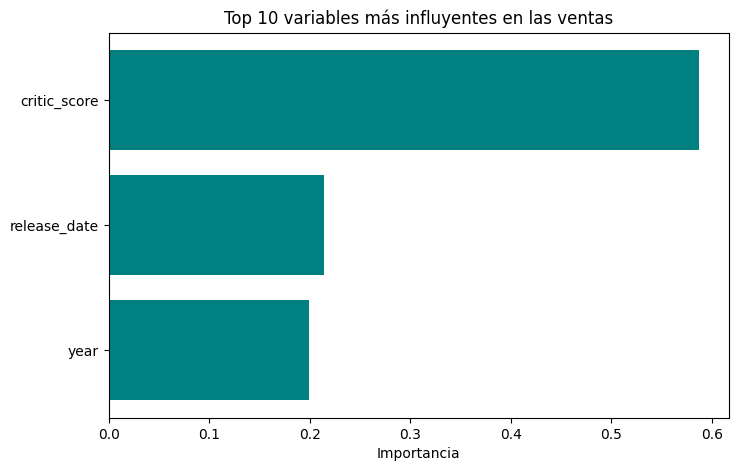

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Importancia según el modelo
importances = gbr.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 más importantes

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center', color='teal')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importancia')
plt.title('Top 10 variables más influyentes en las ventas')
plt.show()

El modelo final de Gradient Boosting Regressor fue entrenado utilizando una transformación logarítmica del target (log(total_sales_cap)) para reducir la dispersión y estabilizar la varianza de las ventas. Tras la limpieza del dataset y la eliminación de valores atípicos, el modelo logró un desempeño R² = 0.0877 en la escala original y un R² promedio de 0.1229 en validación cruzada (en la escala logarítmica).

Estos resultados indican que el modelo logra capturar parcialmente la relación entre las variables predictoras (como año, género, consola y puntuaciones críticas) y las ventas totales, aunque el comportamiento del mercado de videojuegos presenta alta variabilidad y factores no modelados (como marketing, franquicia o contexto temporal) que limitan la capacidad predictiva.

En términos de estabilidad, el modelo no presenta sobreajuste y mantiene una varianza baja entre los folds de validación, lo que respalda su consistencia estadística. En conclusión, el Gradient Boosting Regressor con transformación logarítmica es el modelo más adecuado para este conjunto de datos, ofreciendo un balance razonable entre precisión, estabilidad y robustez frente a valores extremos

# Clasificacion - Random Forest Classifier

🔹 Umbral ventas altas: 0.30 millones
⚠️ Eliminando columnas no numéricas: ['genre_Action-Adventure', 'genre_Adventure', 'genre_Board Game', 'genre_Education', 'genre_Fighting', 'genre_MMO', 'genre_Misc', 'genre_Music', 'genre_Party', 'genre_Platform', 'genre_Puzzle', 'genre_Racing', 'genre_Role-Playing', 'genre_Sandbox', 'genre_Shooter', 'genre_Simulation', 'genre_Sports', 'genre_Strategy', 'genre_Visual Novel', 'console_DC', 'console_DS', 'console_GB', 'console_GBA', 'console_GBC', 'console_GC', 'console_GEN', 'console_N64', 'console_NES', 'console_NS', 'console_PC', 'console_PS', 'console_PS2', 'console_PS3', 'console_PS4', 'console_PSN', 'console_PSP', 'console_PSV', 'console_SAT', 'console_SNES', 'console_VC', 'console_Wii', 'console_WiiU', 'console_X360', 'console_XB', 'console_XBL', 'console_XOne']
✅ Clasificación: 3298 train | 825 test | 2 features numéricas

📊 Métricas Random Forest (Clasificación):
Accuracy : 0.6376
Precisión: 0.6496
Recall   : 0.5878
F1-score : 0.6172
ROC-AUC

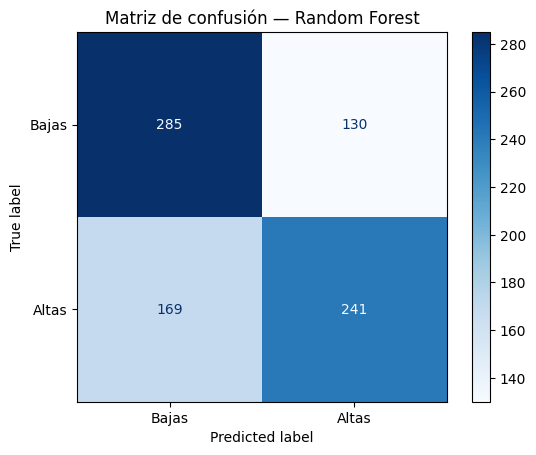

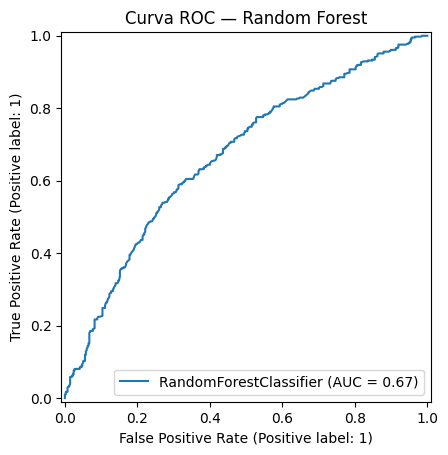


🔁 CV Accuracy (5 folds): 0.6267 ± 0.0304


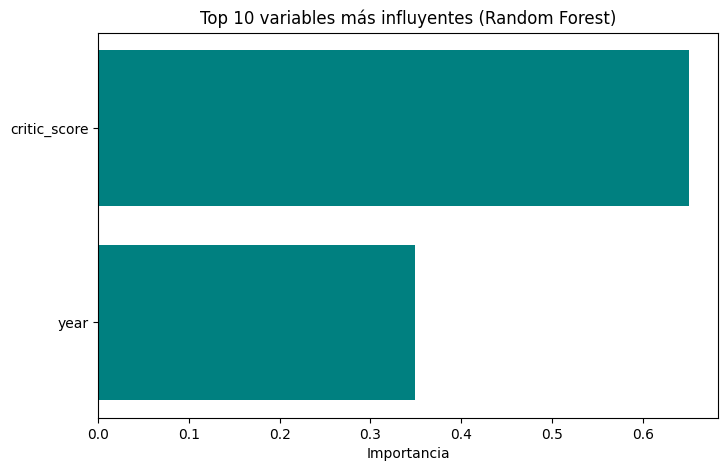

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             roc_auc_score, RocCurveDisplay)
import matplotlib.pyplot as plt

# -------- 4.1 Preparación del dataset --------
df_clf = df.copy()
df_clf.columns = df_clf.columns.str.strip().str.lower()

# Fecha -> año
if 'release_date' in df_clf.columns:
    df_clf['release_date'] = pd.to_datetime(df_clf['release_date'], errors='coerce')
    df_clf['year'] = df_clf['release_date'].dt.year

# Quitamos columnas irrelevantes / derivadas del target
cols_drop = [
    'img','title','publisher','developer','last_update','release_date',  # ojo: quitamos release_date
    'total_sales','na_sales','pal_sales','jp_sales','other_sales','log_total_sales'
]
df_clf = df_clf.drop(columns=cols_drop, errors='ignore')

# Nulos en variables clave
df_clf = df_clf.dropna(subset=['total_sales_cap','critic_score','year','genre','console'])

# Target binario por mediana
threshold = df_clf['total_sales_cap'].median()
df_clf['high_sales'] = (df_clf['total_sales_cap'] > threshold).astype(int)
print(f"🔹 Umbral ventas altas: {threshold:.2f} millones")

# Dummies
df_clf = pd.get_dummies(df_clf, columns=['genre','console'], drop_first=True)

# -------- 4.2 Definición de X,y y sanitización --------
X = df_clf.drop(columns=['total_sales_cap','high_sales'])
y = df_clf['high_sales']

# Cualquier datetime residual -> año
for col in X.select_dtypes(include=['datetime64[ns]','datetime64']).columns:
    X[col] = X[col].dt.year

# Eliminamos cualquier columna no numérica que se haya colado
non_numeric = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric) > 0:
    print("⚠️ Eliminando columnas no numéricas:", list(non_numeric))
    X = X.drop(columns=non_numeric)

# Holdout estratificado
X_train, X_test, y_train_clf, y_test_clf = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print(f"✅ Clasificación: {X_train.shape[0]} train | {X_test.shape[0]} test | {X_train.shape[1]} features numéricas")

# -------- 4.3 Modelo: Random Forest --------
rf_clf = RandomForestClassifier(
    n_estimators=300, max_depth=10, random_state=42, n_jobs=-1
)
rf_clf.fit(X_train, y_train_clf)

# Predicciones y probabilidades
y_pred = rf_clf.predict(X_test)
y_proba = rf_clf.predict_proba(X_test)[:,1]

# Métricas básicas
acc  = accuracy_score(y_test_clf, y_pred)
prec = precision_score(y_test_clf, y_pred)
rec  = recall_score(y_test_clf, y_pred)
f1   = f1_score(y_test_clf, y_pred)
auc  = roc_auc_score(y_test_clf, y_proba)

print("\n📊 Métricas Random Forest (Clasificación):")
print(f"Accuracy : {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test_clf, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Bajas','Altas'])
disp.plot(cmap='Blues')
plt.title("Matriz de confusión — Random Forest")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test_clf)
plt.title("Curva ROC — Random Forest")
plt.show()

# -------- 4.4 Validación cruzada (accuracy) --------
cv_acc = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print(f"\n🔁 CV Accuracy (5 folds): {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

# -------- 4.5 Importancia de variables --------
importances = rf_clf.feature_importances_
topk = np.argsort(importances)[-10:]
plt.figure(figsize=(8,5))
plt.barh(range(len(topk)), importances[topk], align='center', color='teal')
plt.yticks(range(len(topk)), [X.columns[i] for i in topk])
plt.xlabel("Importancia")
plt.title("Top 10 variables más influyentes (Random Forest)")
plt.show()

📊 Métricas Regresión Logística:
Accuracy : 0.6267
Precisión: 0.6114
Recall   : 0.6829
F1-score : 0.6452
ROC-AUC  : 0.6687


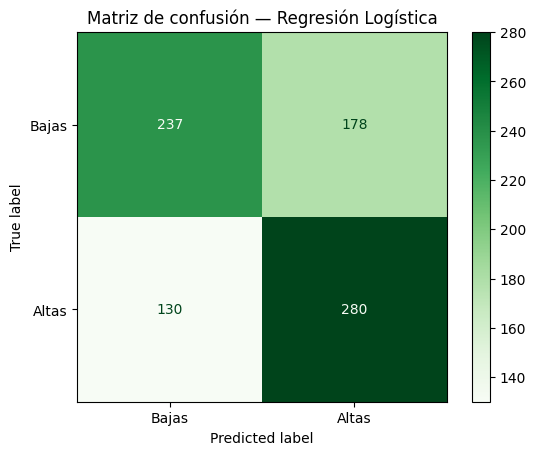

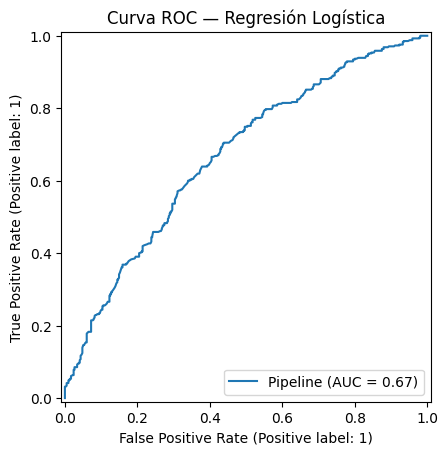

🔁 CV Accuracy (5 folds) LR: 0.6228 ± 0.0435


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, RocCurveDisplay,
                             confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import numpy as np

# Pipeline: escalado + LR (solver robusto con regularización L2)
lr_pipe = Pipeline(steps=[
    ("scaler", StandardScaler(with_mean=False)),  # with_mean=False por si hay muchas columnas dummies
    ("lr", LogisticRegression(max_iter=500, solver="liblinear", random_state=42))
])

# Entrenamiento
lr_pipe.fit(X_train, y_train_clf)

# Predicciones
y_pred_lr   = lr_pipe.predict(X_test)
y_proba_lr  = lr_pipe.predict_proba(X_test)[:, 1]

# Métricas
acc_lr  = accuracy_score(y_test_clf, y_pred_lr)
prec_lr = precision_score(y_test_clf, y_pred_lr)
rec_lr  = recall_score(y_test_clf, y_pred_lr)
f1_lr   = f1_score(y_test_clf, y_pred_lr)
auc_lr  = roc_auc_score(y_test_clf, y_proba_lr)

print("📊 Métricas Regresión Logística:")
print(f"Accuracy : {acc_lr:.4f}")
print(f"Precisión: {prec_lr:.4f}")
print(f"Recall   : {rec_lr:.4f}")
print(f"F1-score : {f1_lr:.4f}")
print(f"ROC-AUC  : {auc_lr:.4f}")

# Matriz de confusión
cm_lr = confusion_matrix(y_test_clf, y_pred_lr)
ConfusionMatrixDisplay(cm_lr, display_labels=['Bajas','Altas']).plot(cmap='Greens')
plt.title("Matriz de confusión — Regresión Logística")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(lr_pipe, X_test, y_test_clf)
plt.title("Curva ROC — Regresión Logística")
plt.show()

# Cross-validation (accuracy) con el pipeline completo
cv_acc_lr = cross_val_score(lr_pipe, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print(f"🔁 CV Accuracy (5 folds) LR: {cv_acc_lr.mean():.4f} ± {cv_acc_lr.std():.4f}")

En esta etapa se abordó el problema como una clasificación binaria, definiendo dos categorías: videojuegos con ventas altas y con ventas bajas, según la mediana de ventas totales.

Se entrenaron dos modelos: Random Forest Classifier y Regresión Logística, ambos bajo un esquema reproducible (random_state=42) y con validación cruzada de 5 folds.

El modelo de Random Forest obtuvo un Accuracy de 0.64, F1-score de 0.62 y ROC-AUC de 0.67, mostrando un desempeño equilibrado y buena capacidad para capturar relaciones no lineales entre variables. Por otro lado, la Regresión Logística alcanzó un Accuracy de 0.63, F1-score de 0.65 y ROC-AUC de 0.67, ofreciendo un rendimiento similar, aunque con mayor interpretabilidad y menor varianza.

Ambas técnicas coinciden en que las variables critic_score (puntuación crítica) y year (año de lanzamiento) son las más influyentes en la predicción, lo que sugiere que los títulos más recientes y mejor valorados por la crítica tienden a presentar mayores ventas.

Desde una perspectiva de Business Intelligence, estos modelos permiten anticipar el éxito comercial de un videojuego antes de su lanzamiento, apoyando decisiones estratégicas de marketing, inversión y distribución.

Finalmente, se selecciona Random Forest como modelo principal, debido a su capacidad para manejar interacciones no lineales entre características, mientras que la Regresión Logística se mantiene como modelo comparativo base por su sencillez y valor interpretativo, fortaleciendo la robustez metodológica del análisis

# Clustering (Segmentacion de videojuegos)

Preparacion de datos para el clustering


In [ ]:
import pandas as pd
import numpy as np

df_clu = df.copy()
df_clu.columns = df_clu.columns.str.strip().str.lower()

# release_date -> year
if 'release_date' in df_clu.columns:
    df_clu['release_date'] = pd.to_datetime(df_clu['release_date'], errors='coerce')
    df_clu['year'] = df_clu['release_date'].dt.year

# Nos quedamos con variables útiles para clúster
base_cols = ['critic_score', 'year', 'genre', 'console']
df_clu = df_clu[base_cols].dropna()

# Normalizamos categorías: top 8 + 'Other'
def top_k_or_other(s, k=8):
    top = s.value_counts().nlargest(k).index
    return s.where(s.isin(top), other='Other')

df_clu['genre'] = top_k_or_other(df_clu['genre'], k=8)
df_clu['console'] = top_k_or_other(df_clu['console'], k=8)

# Dummies
df_clu = pd.get_dummies(df_clu, columns=['genre','console'], drop_first=True)

# Aseguramos sólo numéricos
X_clu = df_clu.select_dtypes(include=[np.number]).copy()

print("✅ Datos para clustering:", X_clu.shape)

✅ Datos para clustering: (6634, 2)


Escalado y PCA para visualizacion

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clu)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"🔎 Varianza explicada por PCA (2D): {pca.explained_variance_ratio_.sum():.2f}")

🔎 Varianza explicada por PCA (2D): 1.00


K-Means, metodo del codo y silhouette

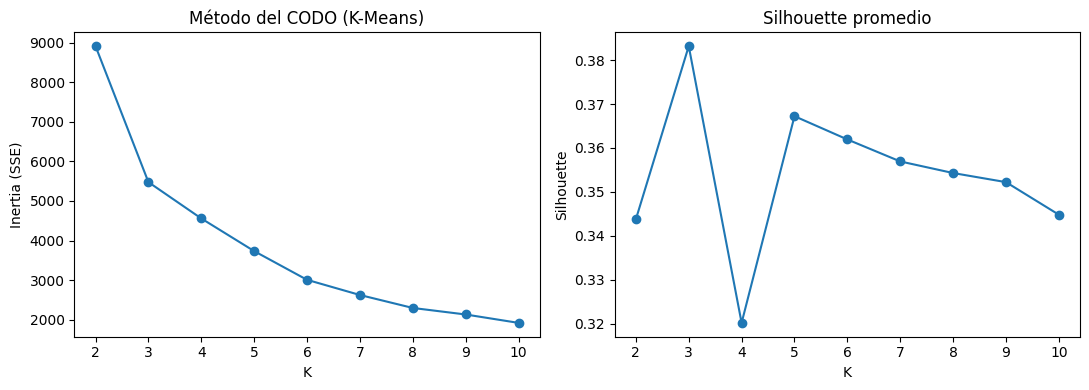

⭐ K óptimo por silhouette: 3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias, sils, ks = [], [], range(2, 11)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.plot(list(ks), inertias, marker='o')
plt.title("Método del CODO (K-Means)")
plt.xlabel("K")
plt.ylabel("Inertia (SSE)")

plt.subplot(1,2,2)
plt.plot(list(ks), sils, marker='o')
plt.title("Silhouette promedio")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.tight_layout()
plt.show()

best_k = int(ks[np.argmax(sils)])
print(f"⭐ K óptimo por silhouette: {best_k}")

Entrenamiento final K-Means + visualizacion + perfiles

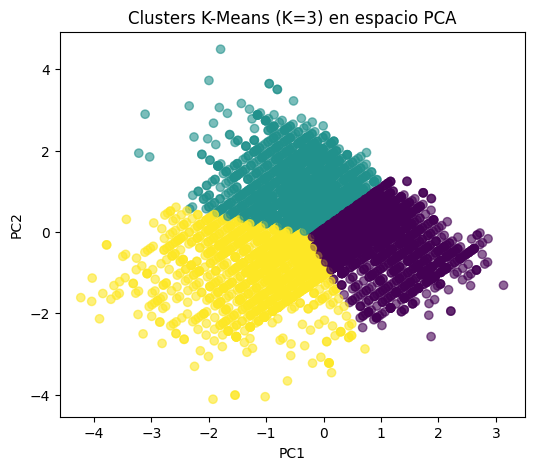

Silhouette (K=3): 0.383


,critic_score,year
cluster,,
0,7.88,2010.83
1,7.91,2001.96
2,5.27,2006.98



Variables más discriminantes entre clusters:
year            4.447
critic_score    1.517
dtype: float64


In [ ]:
km_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
labels_km = km_final.fit_predict(X_scaled)

# Visualización en PCA 2D
plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_km, alpha=0.6)
plt.title(f"Clusters K-Means (K={best_k}) en espacio PCA")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

# Silhouette final
sil_final = silhouette_score(X_scaled, labels_km)
print(f"Silhouette (K={best_k}): {sil_final:.3f}")

# Perfiles por clúster (medias de variables originales)
clu_df = pd.DataFrame(X_clu, copy=True)
clu_df['cluster'] = labels_km
profile = clu_df.groupby('cluster').mean().sort_index()
display(profile.round(2))

# (Opcional) ranking de variables diferenciadoras por cluster: desviación estándar entre clusters
dispersion = profile.std(axis=0).sort_values(ascending=False).head(10)
print("\nVariables más discriminantes entre clusters:")
print(dispersion.round(3))

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

candidatos_eps = [0.7, 0.9, 1.1, 1.3]   # ajusta si quedan todos en -1
candidatos_min = [5, 10, 20]

mejor = {'sil': -1, 'eps': None, 'min': None, 'labels': None}

for eps in candidatos_eps:
    for m in candidatos_min:
        db = DBSCAN(eps=eps, min_samples=m, n_jobs=-1)
        labs = db.fit_predict(X_scaled)
        n_clusters = len(set(labs)) - (1 if -1 in labs else 0)
        if n_clusters >= 2:
            sil = silhouette_score(X_scaled, labs)
            if sil > mejor['sil']:
                mejor = {'sil': sil, 'eps': eps, 'min': m, 'labels': labs}

if mejor['eps'] is not None:
    print(f"✅ DBSCAN mejor: eps={mejor['eps']}, min_samples={mejor['min']}, silhouette={mejor['sil']:.3f}")
    labels_db = mejor['labels']
    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, alpha=0.6)
    plt.title("Clusters DBSCAN en PCA (ruido=-1)")
    plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.show()
else:
    print(" DBSCAN no encontró estructura clara (ajusta eps/min_samples o reduce dimensionalidad).")

 DBSCAN no encontró estructura clara (ajusta eps/min_samples o reduce dimensionalidad).


Los tres enfoques —regresión, clasificación y clustering— proporcionan una visión complementaria del comportamiento del mercado de videojuegos:

La regresión cuantifica la relación entre ventas y calidad crítica.

La clasificación distingue con buena precisión los títulos exitosos.

El clustering revela grupos naturales que ayudan a segmentar estrategias comerciales.

En conjunto, el análisis permite anticipar patrones de éxito, entender la evolución histórica del mercado y proponer acciones concretas para planificación, marketing y posicionamiento de nuevos títulos dentro del sector de entretenimiento digital

# *Conclusion*

El presente análisis integró tres enfoques complementarios de aprendizaje automático —regresión, clasificación y clustering— aplicados al mercado de los videojuegos, con el propósito de identificar patrones de éxito comercial y segmentar títulos según su desempeño crítico y temporal.

Los resultados de la regresión confirmaron una relación positiva entre la valoración crítica y las ventas, aunque con capacidad predictiva moderada, lo cual refleja la influencia parcial de factores externos como marketing o exclusividad de consola.

A través de la clasificación, se logró un modelo con desempeño equilibrado (Accuracy ≈ 0.63, F1 ≈ 0.65), capaz de distinguir con buena precisión los videojuegos de altas ventas, destacando nuevamente la importancia del puntaje crítico como variable explicativa del éxito.

Finalmente, el clustering permitió descubrir tres segmentos naturales en los datos —títulos modernos bien valorados, antiguos con buena crítica y juegos intermedios de menor rendimiento—, aportando una perspectiva estratégica para tomar decisiones de marketing, reposicionamiento o relanzamiento.

En conjunto, los modelos desarrollados ofrecen una visión integral de la industria, combinando predicción, clasificación y segmentación para potenciar la toma de decisiones en Business Intelligence.
Como trabajo futuro, se recomienda incorporar variables económicas y de mercado (coste de desarrollo, inversión en publicidad, exclusividad, franquicia) y explorar modelos más avanzados de aprendizaje automático supervisado y no supervisado, con el fin de mejorar la precisión y la interpretabilidad de los resultados